In [1]:
import numpy as np
from matplotlib import pyplot as plt

from scipy import stats as sps

from monte_carlo import *
from approximations import *
from genPathes import *
from analytical import *

In [3]:
r = 0.3
sig = 0.2

S0 = 3.0
K = 1.0
T = 2.0

Nt = 20
tn = np.linspace(0, T, Nt + 1)

Nsim = 100000

In [4]:
t = 0.5
St = S0 * np.exp(r * t)

It = (S0 + St) * t / 2

# Arithmetic mean test

In [5]:
Nsims = 2 ** np.arange(1, 15)
n = 20

mu, var = ArithmeticMeanMoments(r, sig, t, T, St, It)

mu_ = []
var_ = []
for Nsim in Nsims:
    mu_list = []
    var_list = []
    for _ in range(n):
        S, A = genArithmeticMean(r, sig, t, T, St, It, Nsim)
        mu_list.append(np.mean(A))
        var_list.append(np.std(A) ** 2)
    mu_.append(np.mean(mu_list))
    var_.append(np.mean(var_list))

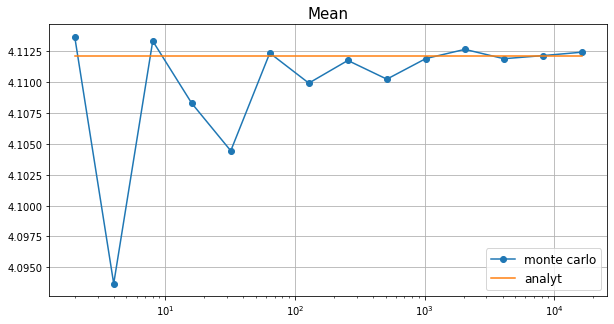

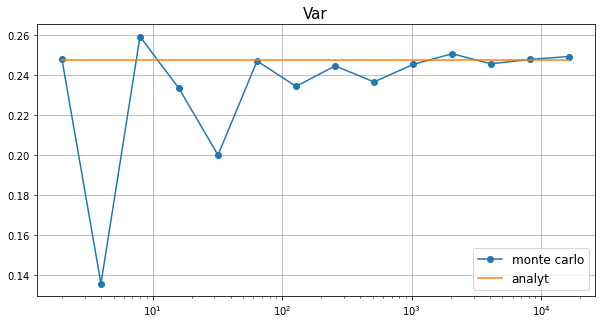

In [6]:
plt.figure(figsize=(10, 5))
plt.semilogx(Nsims, mu_, '-o', label='monte carlo')
plt.semilogx(Nsims, np.ones_like(Nsims) * mu, label='analyt')
plt.title("Mean", fontsize=15)
plt.legend(fontsize=12)
plt.grid()

plt.figure(figsize=(10, 5))
plt.semilogx(Nsims, var_, '-o', label='monte carlo')
plt.semilogx(Nsims, np.ones_like(Nsims) * var, label='analyt')
plt.title("Var", fontsize=15)
plt.legend(fontsize=12)
plt.grid()

# Geometric mean test

In [7]:
It = (np.log(S0) + np.log(St)) / 2 * t

In [8]:
Nsims = 2 ** np.arange(1, 15)
n = 30

mu, var = GeometricMeanMoments(r, sig, t, T, St, It)

mu_ = []
var_ = []
for Nsim in Nsims:
    mu_list = []
    var_list = []
    for _ in range(n):
        S, G = genGeometricMean(r, sig, t, T, St, It, Nsim)
        mu_list.append(np.mean(G))
        var_list.append(np.std(G) ** 2)
    mu_.append(np.mean(mu_list))
    var_.append(np.mean(var_list))

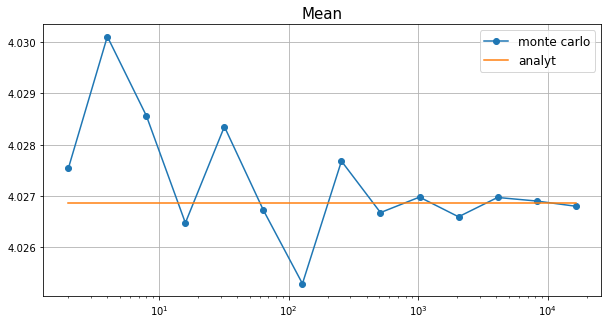

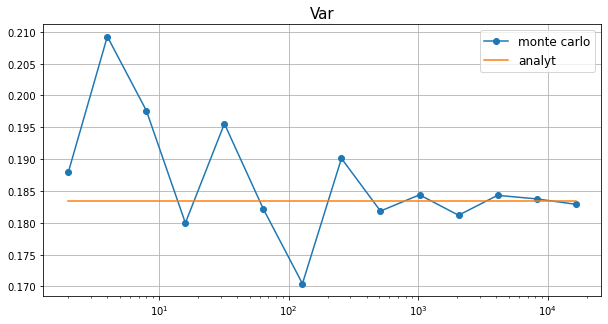

In [9]:
plt.figure(figsize=(10, 5))
plt.semilogx(Nsims, mu_, '-o', label='monte carlo')
plt.semilogx(Nsims, np.ones_like(Nsims) * mu, label='analyt')
plt.title("Mean", fontsize=15)
plt.legend(fontsize=12)
plt.grid()

plt.figure(figsize=(10, 5))
plt.semilogx(Nsims, var_, '-o', label='monte carlo')
plt.semilogx(Nsims, np.ones_like(Nsims) * var, label='analyt')
plt.title("Var", fontsize=15)
plt.legend(fontsize=12)
plt.grid()

# Conditional moments test

In [10]:
t = 0.54

In [11]:
St = S0 * np.exp(r * t)

ST = S0 * np.exp(r * T)

It = (S0 + St) / 2 * t

In [12]:
mu, var = ConditionalMoments(r, sig, t, T, St, ST, It)

In [13]:
Nsims = 2 ** np.arange(3, 18)
n = 15

mu, var = ConditionalMoments(r, sig, t, T, St, ST, It)

mu_ = []
var_ = []
for Nsim in Nsims:
    mu_list = []
    var_list = []
    for _ in range(n):
        S, A = genConditionalArithmeticMean(r, sig, t, T, St, ST, It, Nsim)
        mu_list.append(np.mean(A))
        var_list.append(np.std(A) ** 2)
    mu_.append(np.mean(mu_list))
    var_.append(np.mean(var_list))
mu_ = np.asarray(mu_)
var_ = np.asarray(var_)

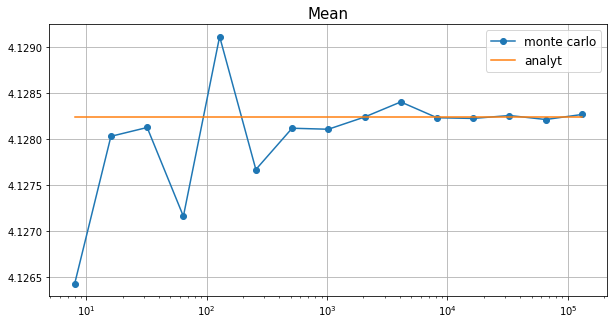

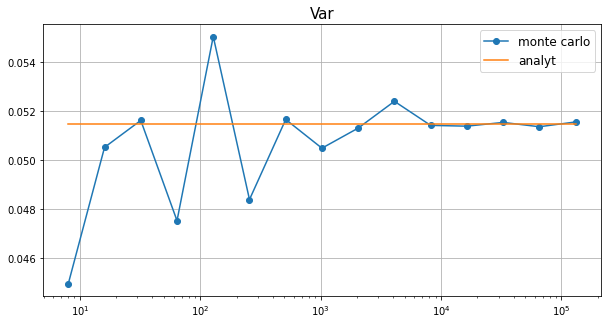

In [14]:
plt.figure(figsize=(10, 5))
plt.semilogx(Nsims, mu_, '-o', label='monte carlo')
plt.semilogx(Nsims, np.ones_like(Nsims) * mu, label='analyt')
plt.title("Mean", fontsize=15)
plt.legend(fontsize=12)
plt.grid()

plt.figure(figsize=(10, 5))
plt.semilogx(Nsims, var_, '-o', label='monte carlo')
plt.semilogx(Nsims, np.ones_like(Nsims) * var, label='analyt')
plt.title("Var", fontsize=15)
plt.legend(fontsize=12)
plt.grid()

In [15]:
assert False

AssertionError: 

# Geometric mean options

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from scipy import stats as sps

from monte_carlo import *
from approximations import *
from genPathes import *
from analytical import *

In [2]:
r = 0.3
sig = 0.2

S0 = 2.12
K = S0
T = 2.0

Nt = 20
tn = np.linspace(0, T, Nt + 1)

Nsim = 1000

Kn = S0 * np.linspace(0.4, 2.3)

In [3]:
ts = np.linspace(0, 0.99, 5) * T

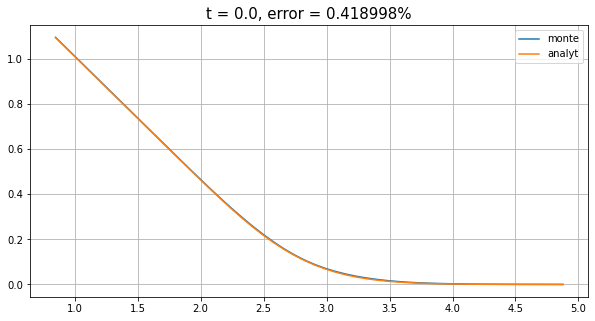

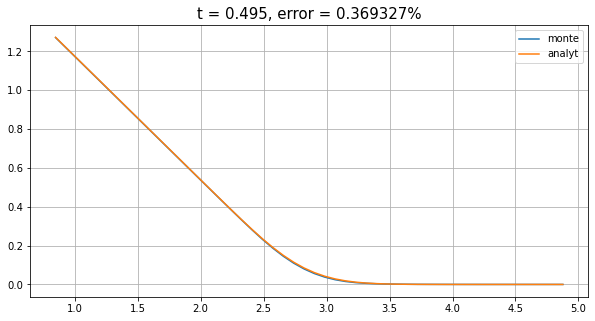

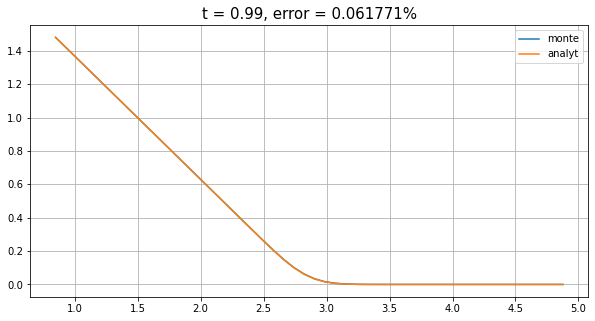

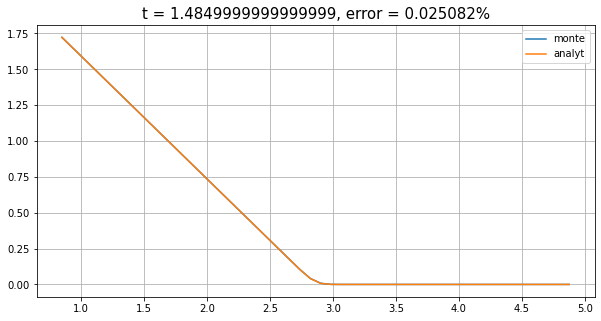

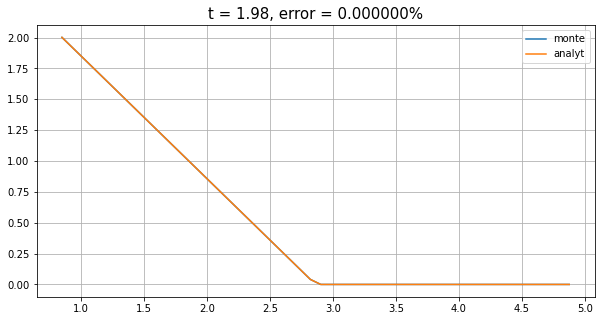

In [4]:
for t in ts:
    
    St = S0 * np.exp(r * t)
    
    #накопленный интеграл
    It = 0.5 * t * (np.log(S0) + np.log(St))
    
    C = MonteCarloGeometricMean(r, sig, t, T, St, It, Kn, Nsim)
    Can = GeometricMeanAnalytical(r, sig, t, T, St, It, Kn)
    
    err = np.linalg.norm(C - Can) / np.linalg.norm(C) * 100
    plt.figure(figsize=(10, 5))

    plt.title(f"t = {t}, error = {err:3f}%", fontsize=15)
    plt.plot(Kn, C, label='monte')
    plt.plot(Kn, Can, label='analyt')
    plt.legend()
    plt.grid()

# Arithmetic options

In [5]:
r = 0.3
sig = 0.2

S0 = 2.12
K = S0
T = 2.0

Nt = 20
tn = np.linspace(0, T, Nt + 1)

Nsim = 1000

Kn = S0 * np.linspace(0.4, 2.3)

ts = np.linspace(0, 0.99, 5) * T

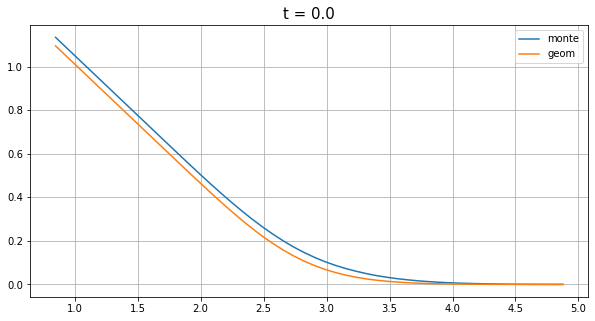

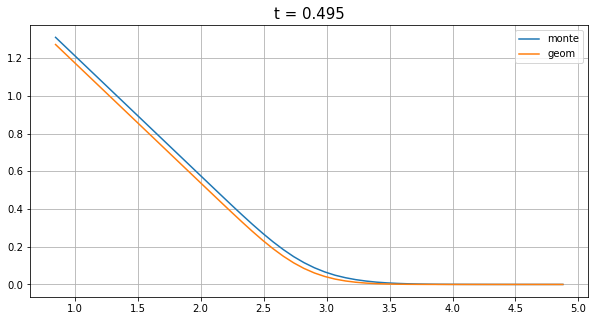

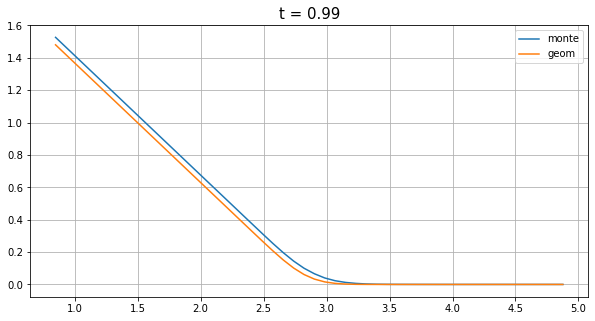

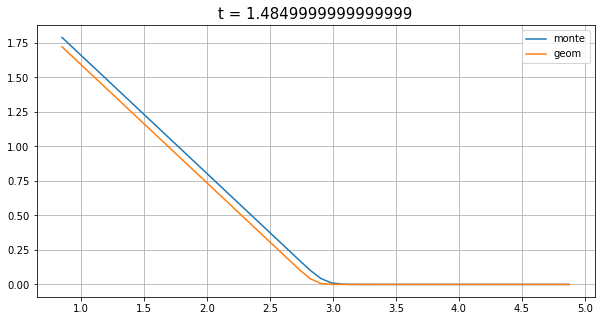

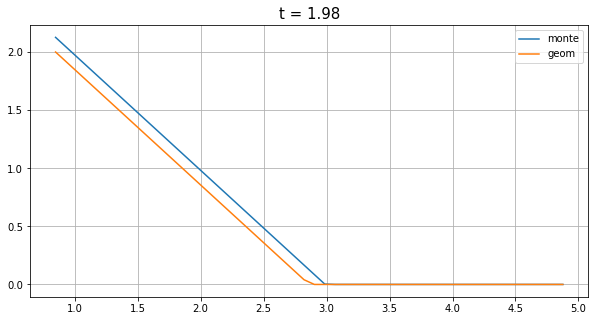

In [6]:
for t in ts:
    
    St = S0 * np.exp(r * t)
    
    #накопленный интеграл
    It = 0.5 * t * (S0 + St)
    
    C = MonteCarloArithmeticMean(r, sig, t, T, St, It, Kn, Nsim)
    G =  GeometricMeanAnalytical(r, sig, t, T, St, 0.5 * t * (np.log(S0) + np.log(St)), Kn)
    plt.figure(figsize=(10, 5))

    plt.title(f"t = {t}", fontsize=15)
    plt.plot(Kn, C, label='monte')
    plt.plot(Kn, G, label='geom')
    plt.legend()
    plt.grid()

# Lognormal and stratified lognormal approximation

In [7]:
r = 0.3
sig = 0.2

S0 = 2.12
K = S0
T = 2.0

Nt = 20
tn = np.linspace(0, T, Nt + 1)

Nsim = 1000

Kn = S0 * np.linspace(0.4, 2.3)

ts = np.linspace(0, 0.5, 5) * T

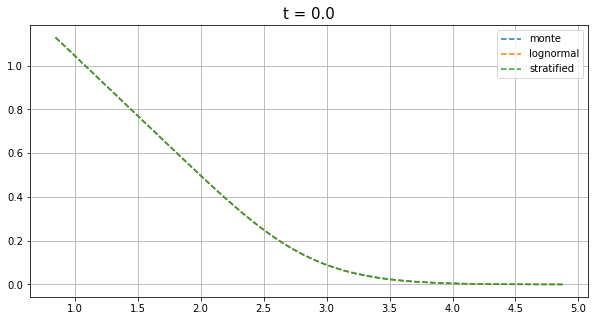

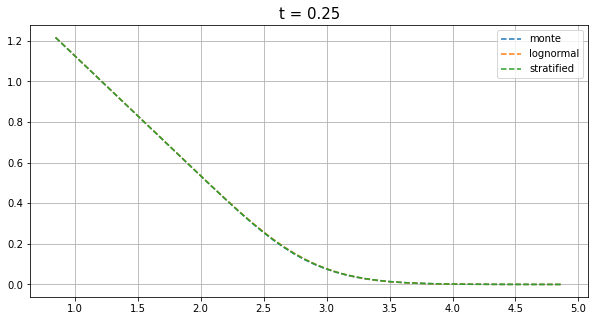

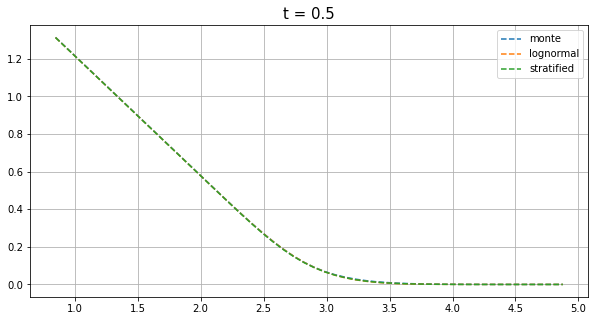

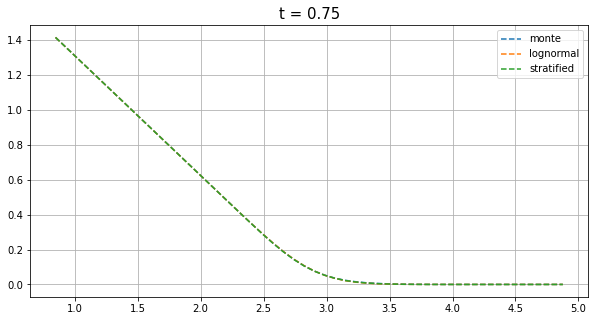

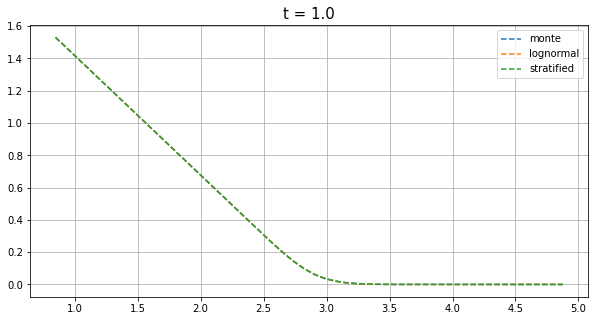

In [8]:
for t in ts:
    
    St = S0 * np.exp(r * t)
    
    #накопленный интеграл
    It = 0.5 * t * (S0 + St)
    
    C = MonteCarloArithmeticMean(r, sig, t, T, St, It, Kn, Nsim)
    C_log = LognormalApprox(r, sig, t, T, St, It, Kn)
    C_strat = StratifiedLognormalApprox(r, sig, t, T, St, It, Kn)
    plt.figure(figsize=(10, 5))

    plt.title(f"t = {t}", fontsize=15)
    plt.plot(Kn, C, '--',label='monte')
    plt.plot(Kn, C_log, '--', label='lognormal')
    plt.plot(Kn, C_strat, '--', label='stratified')
    plt.legend()
    plt.grid()

# Control variate

In [9]:
r = 0.3
sig = 0.2

S0 = 2.12
K = S0
T = 2.0

Nt = 20
tn = np.linspace(0, T, Nt + 1)

Nsim = 1000

Kn = S0 * np.linspace(0.4, 2.3)

t = 0.5

St = S0 * np.exp(r * t)

In [31]:

nit = 30

Ns = 2 ** (np.arange(6, 15))

err1 = []
err2 = []

I1 = 0.5 * t * (np.log(S0) + np.log(St))
I2 = 0.5 * t * (S0 + St)

for N in Ns:
    
    c1 = []
    c2 = []
    
    for _ in range(nit):
        C1 = MonteCarloArithmeticMeanControlVariate(r, sig, t, T, St, I1, I2, K, N)
        C2 = MonteCarloArithmeticMean(r, sig, t, T, St, I2, K, N, True) 
        c1.append(C1)
        c2.append(C2)
    err1.append(np.std(c1) ** 2)
    err2.append(np.std(c2) ** 2)

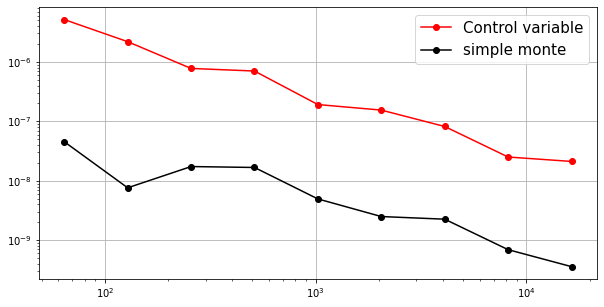

In [32]:
plt.figure(figsize=(10, 5))
plt.loglog(Ns, err1, '-or', label='Control variable')
plt.loglog(Ns, err2, '-ok', label='simple monte')
plt.legend(fontsize=15)
plt.grid()
None